Random Forest Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Random Forest Accuracy: 0.7000

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Logistic Regression Accuracy: 0.7000


c:\Users\beranger\anaconda3\envs\whisper\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(
c:\Users\beranger\anaconda3\envs\whisper\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\beranger\anaconda3\envs\whisper\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\beranger\anaconda3\envs\whisper\lib\site-packages\sklear

<Figure size 800x600 with 0 Axes>

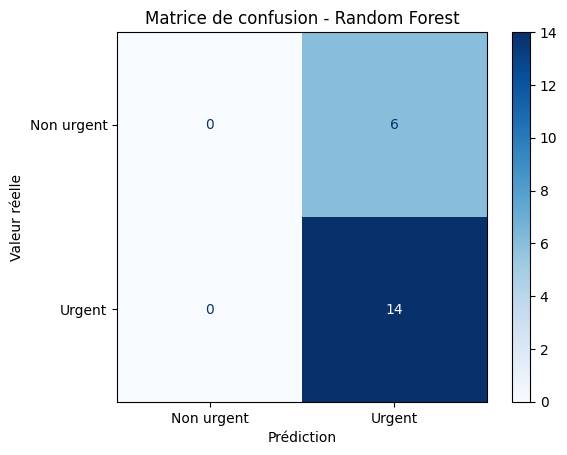

<Figure size 800x600 with 0 Axes>

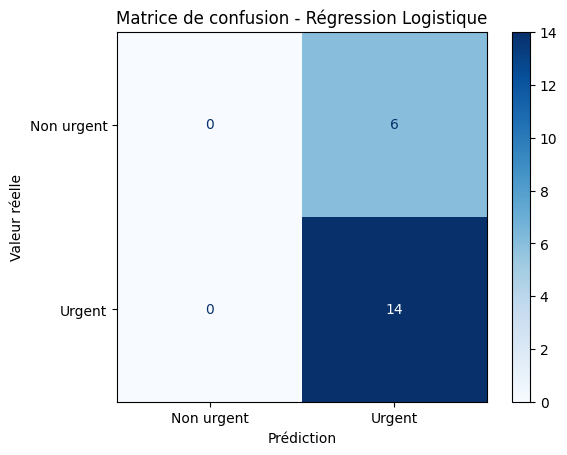

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# importer matrix de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import requests


appels = [
    {
        "appel": [
            "Bonjour, j'ai besoin d'aide immédiatement!",
            "Mon mari a des douleurs à la poitrine et il a du mal à respirer.",
            "Il est conscient mais il transpire beaucoup et il est très pâle.",
            "Il a 65 ans et il a des antécédents de problèmes cardiaques.",
            "Il prend des médicaments pour la tension artérielle et le cholestérol.",
            "Il n'a pas perdu connaissance mais il semble très faible.",
            "Nous sommes à la maison, au 123 rue des Érables.",
            "S'il vous plaît, envoyez une ambulance le plus vite possible!",
            "Il est allongé sur le canapé en ce moment.",
            "Je vais rester avec lui jusqu'à ce que l'ambulance arrive.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin de conseils médicaux.",
            "Mon enfant est tombé de vélo et s'est blessé au genou.",
            "Il a une coupure et ça saigne un peu, mais ce n'est pas très profond.",
            "Il a 10 ans et il est en bonne santé généralement.",
            "Il n'a pas perdu connaissance et il peut marcher, mais il boite.",
            "Nous sommes à la maison, au 456 avenue des Pins.",
            "Je me demande si je dois l'emmener aux urgences ou si je peux le soigner à la maison.",
            "Il n'a pas de douleur ailleurs et il n'a pas de fièvre.",
            "Je vais nettoyer la plaie et mettre un pansement pour l'instant.",
            "Merci pour votre aide.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, c'est une urgence!",
            "Mon ami a une réaction allergique sévère.",
            "Il a mangé des cacahuètes et maintenant il a du mal à respirer.",
            "Il a des éruptions cutanées et son visage est enflé.",
            "Il a 30 ans et il est allergique aux cacahuètes.",
            "Il a un EpiPen mais il ne l'a pas encore utilisé.",
            "Nous sommes au restaurant, au 789 boulevard des Chênes.",
            "S'il vous plaît, envoyez une ambulance immédiatement!",
            "Je vais lui administrer l'EpiPen maintenant.",
            "Il est très anxieux et il a peur.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin de conseils médicaux.",
            "Je me sens très malade depuis ce matin.",
            "J'ai de la fièvre, des frissons et des douleurs musculaires.",
            "Je tousse beaucoup et j'ai mal à la gorge.",
            "Je n'ai pas de problèmes respiratoires mais je me sens très faible.",
            "Je suis à la maison, au 101 rue des Lilas.",
            "Je me demande si je dois aller aux urgences ou si je peux rester à la maison.",
            "Je n'ai pas de conditions médicales préexistantes.",
            "Je vais prendre du paracétamol et me reposer pour l'instant.",
            "Merci pour votre aide.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin d'aide d'urgence!",
            "Ma mère est tombée dans les escaliers et elle ne peut pas se lever.",
            "Elle a 75 ans et elle a des douleurs à la hanche et au dos.",
            "Elle est consciente mais elle semble très souffrante.",
            "Elle n'a pas perdu connaissance mais elle est très pâle.",
            "Nous sommes à la maison, au 234 rue des Roses.",
            "S'il vous plaît, envoyez une ambulance le plus vite possible!",
            "Je vais rester avec elle jusqu'à ce que l'ambulance arrive.",
            "Elle a des antécédents d'ostéoporose.",
            "Merci pour votre aide.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je pense que mon mari fait une crise cardiaque.",
            "Il a une douleur intense dans la poitrine qui irradie vers son bras gauche.",
            "Il est très pâle et transpire abondamment.",
            "Il a du mal à respirer et se plaint de nausées.",
            "Il a des antécédents de problèmes cardiaques.",
            "Ça a commencé il y a environ 10 minutes.",
            "Il est conscient, mais il a l'air très faible.",
            "Nous sommes à la maison, au 123 rue des Érables.",
            "Je suis très inquiète, il ne veut pas que j'appelle, mais je pense que c'est grave.",
            "Il vient de vomir, ça ne s'arrête pas.",
            "Je ne sais pas quoi faire, aidez-nous s'il vous plaît.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai une douleur insupportable au ventre depuis ce matin.",
            "C'est une douleur aiguë, surtout du côté droit.",
            "J'ai aussi de la fièvre et des nausées.",
            "Je n'arrive pas à manger ou à boire sans vomir.",
            "J'ai essayé de prendre un médicament, mais ça n'a rien fait.",
            "La douleur est constante, elle ne s'arrête pas.",
            "Je suis seul chez moi, au 456 avenue du Parc.",
            "Je ne sais pas si c'est grave, mais je ne supporte plus la douleur.",
            "J'ai l'impression que ça empire, je ne peux même plus me lever.",
            "Aidez-moi, s'il vous plaît, je ne sais pas quoi faire.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai du mal à respirer depuis une heure.",
            "J'ai l'impression d'avoir la poitrine serrée et je tousse beaucoup.",
            "J'ai aussi une sensation de sifflement quand je respire.",
            "Je suis asthmatique, mais mon inhalateur ne semble pas fonctionner.",
            "Je me sens de plus en plus faible et étourdi.",
            "Je suis seul chez moi, au 789 boulevard des Cerisiers.",
            "Je ne sais pas si c'est une crise d'asthme ou quelque chose de plus grave.",
            "Je commence à paniquer, ça ne s'améliore pas.",
            "Je ne peux pas marcher sans perdre mon souffle.",
            "S'il vous plaît, envoyez quelqu'un rapidement.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je ne me sens pas bien depuis ce matin.",
            "J'ai des vertiges et une sensation de faiblesse générale.",
            "Je n'ai pas de douleur particulière, mais je me sens très fatigué.",
            "J'ai aussi des sueurs froides et des nausées.",
            "Je ne sais pas si c'est grave, mais je suis inquiet.",
            "Je suis chez moi, au 321 rue des Lilas.",
            "Je n'ai pas de fièvre, mais je me sens vraiment bizarre.",
            "Je n'ai pas mangé depuis hier soir, mais je n'ai pas faim.",
            "Je ne sais pas si je dois aller à l'hôpital ou attendre que ça passe.",
            "Pouvez-vous m'aider à comprendre ce qui se passe ?",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je viens de tomber dans mon escalier.",
            "J'ai atterri sur mon bras et je ne peux plus le bouger.",
            "Il y a aussi une grosse bosse sur ma tête et je me sens étourdi.",
            "Je saigne un peu du bras, mais ce n'est pas trop grave.",
            "Je suis seul chez moi, au 654 avenue des Roses.",
            "Je ne sais pas si je dois aller à l'hôpital ou attendre.",
            "J'ai peur de m'être cassé quelque chose.",
            "Je ne veux pas bouger trop pour ne pas aggraver la situation.",
            "Je me sens un peu nauséeux, mais je pense que c'est à cause du choc.",
            "Pouvez-vous envoyer quelqu'un pour m'aider ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je pense faire une réaction allergique grave.",
            "J'ai mangé des noix il y a environ 20 minutes et maintenant j'ai du mal à respirer.",
            "Mon visage commence à gonfler et j'ai des démangeaisons partout.",
            "J'ai aussi des rougeurs sur tout le corps.",
            "Je n'ai pas d'EpiPen sur moi, je ne sais pas quoi faire.",
            "Je suis au restaurant, au 987 rue des Chênes.",
            "Je commence à paniquer, je ne me sens pas bien du tout.",
            "Je ne veux pas attendre que ça empire, aidez-moi s'il vous plaît.",
            "Je sens que ma gorge se serre de plus en plus.",
            "Envoyez quelqu'un rapidement, je ne peux pas respirer correctement.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Oui bonjour, j'ai besoin d'une ambulance rapidement s'il vous plaît.",
            "C'est pour mon mari, il a une forte douleur dans la poitrine depuis environ 20 minutes.",
            "Il a 58 ans.",
            "Non, il est conscient, il est assis sur le canapé mais il est très pâle et en sueur.",
            "Oui, la douleur est plutôt au centre de la poitrine, il dit que ça lui serre comme un étau.",
            "La douleur s'étend un peu dans le bras gauche aussi.",
            "Non, il n'a jamais eu ça avant.",
            "Oui il a de l'hypertension, il prend du Coversyl.",
            "D'accord je reste avec lui, je ne le quitte pas des yeux.",
            "Oui il est toujours conscient mais il a vraiment l'air mal.",
            "16 rue des Lilas, au deuxième étage. Le code est 4829.",
            "D'accord, je laisse la porte de l'appartement entrouverte.",
            "Merci, je les attends.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonsoir, j'aurais besoin d'un avis médical s'il vous plaît.",
            "J'ai une migraine terrible depuis ce matin, ça ne passe pas malgré les médicaments.",
            "J'ai pris deux fois du Doliprane 1000 mais ça n'a rien fait.",
            "Non, je n'ai pas de nausées, juste ce mal de tête insupportable.",
            "Oui, je suis sensible à la lumière, je suis dans le noir depuis ce matin.",
            "Non, ce n'est pas la première fois, j'ai déjà eu des migraines mais jamais aussi longtemps.",
            "Ça fait environ 12 heures maintenant.",
            "Non, pas de fièvre.",
            "J'ai 34 ans.",
            "Non, je ne prends pas de traitement particulier.",
            "D'accord, je comprends.",
            "Oui, je peux me déplacer jusqu'à la garde médicale.",
            "D'accord, merci pour ces informations.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "S'il vous plaît, envoyez une ambulance, je crois que je fais une réaction allergique !",
            "J'ai mangé des cacahuètes il y a 10 minutes, ma gorge me gratte et j'ai du mal à respirer.",
            "Oui, j'ai déjà fait des allergies aux fruits à coque.",
            "Non, je n'ai pas d'EpiPen sur moi.",
            "Ma langue commence à gonfler et j'ai des plaques rouges sur les bras.",
            "Je suis seule à la maison.",
            "25 avenue Victor Hugo, appartement 12.",
            "Oui, je peux descendre ouvrir, je suis encore capable de marcher.",
            "Ça empire, ma respiration devient vraiment difficile.",
            "D'accord, je reste près de la porte d'entrée.",
            "Je les entends, ils arrivent.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonsoir, j'appelle car je ne sais pas trop quoi faire.",
            "J'ai des vomissements et de la diarrhée depuis ce matin.",
            "Non, pas de fièvre, j'ai vérifié.",
            "Environ toutes les deux heures je dirais.",
            "Oui, j'arrive à boire un peu d'eau mais je ne garde pas grand chose.",
            "J'ai 45 ans, pas de problème de santé particulier.",
            "Non, personne d'autre n'est malade chez moi.",
            "Hier soir j'ai mangé au restaurant, peut-être que ça vient de là.",
            "Oui, j'ai encore des sachets de réhydratation à la maison.",
            "D'accord, je comprends, je vais suivre vos conseils.",
            "Non, pas de sang dans les selles.",
            "Très bien, merci de votre aide.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Vite, quelque chose ne va pas avec ma mère !",
            "Elle parle bizarrement, je ne comprends pas ce qu'elle dit.",
            "Ça a commencé il y a environ 5 minutes.",
            "Elle est assise, elle est consciente mais son visage est bizarre, un côté semble tombant.",
            "Elle a 72 ans.",
            "Oui, elle est hypertendue et diabétique.",
            "Non, elle n'arrive pas à lever son bras droit.",
            "Elle est consciente mais très confuse.",
            "28 rue des Peupliers, rez-de-chaussée.",
            "Oui, la porte d'entrée donne directement sur la rue.",
            "D'accord, je ne la fais pas bouger.",
            "Je reste en ligne.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je crois que mon mari fait une crise cardiaque.",
            "Il a soudainement des douleurs dans la poitrine et il transpire énormément.",
            "Oui, il a du mal à respirer.",
            "Il dit que la douleur irradie vers son bras gauche.",
            "Il est très pâle, et il a l'air désorienté.",
            "Non, il n'a jamais eu de problèmes cardiaques auparavant.",
            "Il a 56 ans, et il prend des médicaments pour l'hypertension.",
            "Je l'ai mis en position assise, mais il semble encore très mal.",
            "S'il vous plaît, dépêchez-vous, il semble vraiment en danger.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon fils est tombé de son vélo et s'est éraflé le genou.",
            "Il saigne un peu, mais ce n'est pas très profond.",
            "Non, il n'a pas perdu connaissance.",
            "Oui, il pleure, mais il a l'air surtout effrayé.",
            "Il a 8 ans.",
            "Je l'ai désinfecté, et j'ai mis un pansement.",
            "Vous pensez que je dois aller chez un médecin ou attendre ?",
            "Je ne crois pas que ce soit très grave, mais je voulais être sûr.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon frère a mangé quelque chose et il a du mal à respirer.",
            "Il est allergique aux noix, et je pense qu'il en a mangé par accident.",
            "Son visage est enflé, et il commence à devenir bleu.",
            "Oui, il a un auto-injecteur d'épinéphrine, je vais le chercher maintenant.",
            "Je viens de l'utiliser, mais il ne semble pas aller beaucoup mieux.",
            "Non, il n'a jamais eu une réaction aussi sévère avant.",
            "Il a 29 ans, et il n'a pas d'autres problèmes médicaux connus.",
            "Je ne sais pas quoi faire, s'il vous plaît envoyez quelqu'un rapidement !",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, j'ai des douleurs très fortes dans le bas-ventre.",
            "Ça a commencé il y a environ deux heures, et c'est de pire en pire.",
            "Oui, j'ai aussi des nausées, et je me sens très faible.",
            "Non, je n'ai pas de fièvre, du moins je ne crois pas.",
            "Je ne suis pas enceinte, non.",
            "J'ai 32 ans, et je n'ai pas de problèmes de santé particuliers.",
            "Non, je n'ai pas pris de médicaments pour ça, je ne sais pas quoi faire.",
            "Vous pensez que je dois aller à l'hôpital tout de suite ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, ma grand-mère vient de s'évanouir, et je n'arrive pas à la réveiller.",
            "Elle respire encore, mais elle est très faible.",
            "Elle a 82 ans, et elle prend des médicaments pour le diabète et l'hypertension.",
            "Oui, elle était assise tranquillement quand c'est arrivé.",
            "Non, elle ne s'est pas cognée en tombant, elle était déjà dans son fauteuil.",
            "Je ne sais pas pourquoi c'est arrivé, elle n'a rien mangé d'inhabituel aujourd'hui.",
            "Je suis vraiment inquiet, elle ne réagit pas du tout quand je l'appelle.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je voulais savoir si je devais m'inquiéter pour ma fille.",
            "Elle a de la fièvre depuis trois jours, autour de 38,5°C.",
            "Oui, elle tousse un peu, mais elle joue encore normalement.",
            "Elle a 5 ans, et elle est généralement en bonne santé.",
            "Je lui donne du paracétamol toutes les six heures, et ça baisse un peu.",
            "Vous pensez que je dois l'emmener chez le médecin, ou attendre encore un jour ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Allo, je viens d'assister à un braquage !",
            "C'est à la bijouterie du centre-ville, rue de la Paix à Nice.",
            "Deux hommes masqués sont entrés et ont menacé le personnel avec des armes.",
            "Ils viennent de sortir et s'enfuient en scooter noir.",
            "Non, je n'ai pas vu de blessés, mais tout le monde est sous le choc.",
            "D'accord, je reste sur place pour témoigner auprès de la police.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Au secours ! Mon bébé s'étouffe !",
            "Il a 8 mois, il a avalé quelque chose et n'arrive plus à respirer.",
            "Oui, il est conscient mais il devient tout rouge.",
            "D'accord, je vais essayer la manœuvre que vous m'indiquez.",
            "Ça y est ! Il a recraché l'objet et recommence à respirer normalement.",
            "Merci beaucoup, oui, je reste en ligne au cas où.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je signale un début d'incendie dans une forêt.",
            "C'est dans le massif des Calanques, près de Cassis.",
            "Je vois de la fumée qui s'élève et des petites flammes au loin.",
            "Non, je ne vois personne à proximité, la zone semble déserte.",
            "Je suis sur un sentier de randonnée, à environ 2 km du parking des Gardes.",
            "Compris, je vais quitter la zone et retourner vers le parking.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Allo, il y a eu un carambolage sur l'autoroute A1.",
            "C'est juste après la sortie pour l'aéroport Charles de Gaulle, direction Paris.",
            "Je vois au moins cinq voitures impliquées, dont un camion renversé.",
            "Oui, il y a des blessés, j'entends des gens crier dans les véhicules.",
            "La circulation est complètement bloquée dans les deux sens.",
            "D'accord, je vais essayer d'aider en attendant l'arrivée des secours.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je crois que mon voisin fait un AVC.",
            "Il a soudainement du mal à parler et la moitié de son visage est tombante.",
            "C'est un homme de 65 ans, sans antécédents médicaux à ma connaissance.",
            "Oui, il est conscient mais très confus.",
            "On est au 8 rue des Cerisiers à Strasbourg, appartement 3B au 2ème étage.",
            "D'accord, je reste avec lui et je vous rappelle si son état change.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon fils de 3 ans fait une crise bizarre depuis quelques minutes !",
            "Il a une fièvre très élevée et son corps tremble de partout.",
            "Il ne répond pas quand je lui parle et ses yeux révulsent.",
            "Ça dure depuis 2 minutes, je ne sais pas comment arrêter ça.",
            "Il a déjà eu des convulsions fébriles il y a un an, mais jamais aussi longues.",
            "Je suis terrifiée, il a la bouche bleue et respire très vite.",
            "Nous sommes au 555 rue des Jardins, troisième étage.",
            "Je viens de lui mettre un suppositoire de doliprane, mais rien ne change.",
            "Il vient de vomir sur le canapé, ça continue de trembler.",
            "Aidez-moi, s'il vous plaît, je crois qu'il va s'étouffer !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, ma mère vient d'avoir un malaise étrange.",
            "Elle ne parvient plus à bouger le côté droit de son corps.",
            "Sa parole est confuse, on dirait qu'elle mélange les mots.",
            "Elle a un sourire asymétrique et cligne des yeux de façon inhabituelle.",
            "Elle a des antécédents d'hypertension et prend des médicaments.",
            "Ça a commencé il y a 15 minutes pendant le déjeuner.",
            "Nous sommes au 222 chemin des Oliviers, maison blanche.",
            "Elle essaie de se lever mais n'y arrive pas, je la retiens.",
            "Elle semble de plus en plus désorientée, je panique.",
            "Dépêchez-vous, elle a l'air de perdre connaissance !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je me suis renversé de l'huile bouillante sur le bras en cuisinant.",
            "La peau est complètement rouge avec des cloques énormes.",
            "La douleur est insupportable malgré l'eau froide que j'ai mise pendant 10 minutes.",
            "Je commence à avoir des frissons et des nausées.",
            "Je suis seul dans mon appartement au 777 avenue des Saules.",
            "Je ne vois plus bien la zone brûlée à cause des cloques qui grossissent.",
            "Je n'ai pas de pommade spéciale, juste du paracétamol.",
            "Je pense que c'est une brûlure au troisième degré, ça me terrifie.",
            "Je ne peux même plus bouger mon bras sans hurler.",
            "Pouvez-vous envoyer une ambulance rapidement ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je suis diabétique et je me sens très mal depuis une heure.",
            "Mon lecteur de glycémie affiche 'HI', ce qui veut dire que c'est trop élevé.",
            "J'ai une soif intense et je vomis tout ce que je bois.",
            "Ma respiration est rapide et saccadée, comme si j'étouffais.",
            "Je suis confus, j'arrive à peine à composer le numéro.",
            "Je suis au 888 rue des Pins, derrière la boulangerie.",
            "J'ai essayé de prendre de l'insuline, mais ça n'a pas fonctionné.",
            "Mes jambes tremblent, je ne tiens plus debout.",
            "Je vois des points noirs devant mes yeux...",
            "Je crois que je vais m'évanouir, dépêchez-vous...",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, ma grand-mère de 89 ans est très affaiblie depuis ce matin.",
            "Elle est couchée et ne reconnaît plus personne depuis une heure.",
            "Elle a une respiration irrégulière et des lèvres violacées.",
            "Elle a des antécédents d'insuffisance cardiaque et de pneumonie.",
            "Nous sommes au 444 allée des Cyprès, rez-de-chaussée.",
            "Elle refuse de boire ou de parler, juste des grognements.",
            "Je viens de prendre sa tension : 8/5, c'est dangereux non ?",
            "Elle a fait un AVC il y a deux ans, je crains que ça recommence.",
            "Je ne peux pas la soulever pour la mettre dans la voiture.",
            "Elle semble s'affaiblir de minute en minute, aidez-nous !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai une éruption bizarre sur tout le corps depuis une heure.",
            "Des plaques rouges géantes avec des démangeaisons intenses.",
            "Ma gorge gratte un peu mais je respire encore normalement.",
            "J'ai pris un antihistaminique il y a 30 minutes sans amélioration.",
            "Je suis au 333 impasse des Vignes, porte verte.",
            "Je n'ai jamais eu d'allergie avant, je suis perplexe.",
            "J'ai mangé des fruits de mer au déjeuner, peut-être ça ?",
            "Maintenant mes paupières gonflent et ça brûle.",
            "Je commence à avoir chaud et mal à la tête.",
            "Dois-je me rendre aux urgences ou attendre ? Je ne sais pas...",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai la pire migraine de ma vie depuis 20 minutes.",
            "Une douleur fulgurante derrière l'œil droit, comme un coup de couteau.",
            "Je vois des flashs lumineux et j'ai du mal à articuler.",
            "J'ai vomi trois fois et la lumière me fait horriblement mal.",
            "Je suis sous traitement contre l'hypertension, si ça peut aider.",
            "Adresse : 999 route des Lavandes, garage ouvert.",
            "Je n'ai jamais ressenti ça avant, même pas avec mes migraines habituelles.",
            "Je sens comme une pression dans ma nuque qui augmente.",
            "J'ai peur que ce soit une hémorragie cérébrale ou quelque chose comme ça.",
            "Je ne tiens plus debout, envoyez quelqu'un vite !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je viens de me faire piquer par quelque chose dans mon jardin.",
            "Ma main a triplé de volume en 10 minutes et devient bleuâtre.",
            "La douleur est atroce, comme si mon bras était en feu.",
            "J'ai des fourmillements dans tout le corps et des vertiges.",
            "Je suis allergique aux guêpes, mais je n'ai pas vu l'insecte.",
            "Adresse : 111 hameau des Châtaigniers, cabanon rouge.",
            "J'ai utilisé mon EpiPen il y a 5 minutes, mais ça empire encore.",
            "Je n'arrive plus à avaler ma salive, ma langue est lourde.",
            "Mon cœur bat à 200, je vais faire un infarctus !",
            "Vite, je perds connaissance, je...",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, toute ma famille vomit et a la diarrhée depuis minuit.",
            "On a mangé des conserves maison hier soir, ça sentait bizarre.",
            "Ma femme a des crampes abdominales tellement fortes qu'elle hurle.",
            "Mon fils de 5 ans est léthargique et refuse de boire.",
            "Nous sommes au 666 sentier des Bruyères, maison en bois.",
            "Je viens de voir du sang dans les selles de mon père âgé.",
            "La fièvre monte à 40°C pour certains, on délire un peu.",
            "Notre voiture est en panne, on ne peut pas se déplacer.",
            "Je crains un botulisme ou une salmonelle, c'est très suspect.",
            "On a besoin d'aide médicale rapidement, on se déshydrate !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin d'aide immédiatement!",
            "Mon fils a une crise d'asthme sévère.",
            "Il a du mal à respirer et il siffle beaucoup.",
            "Il a 12 ans et il est asthmatique depuis longtemps.",
            "Il a déjà utilisé son inhalateur mais ça ne semble pas aider.",
            "Il est très anxieux et il commence à paniquer.",
            "Nous sommes à la maison, au 567 rue des Ormes.",
            "S'il vous plaît, envoyez une ambulance le plus vite possible!",
            "Il est assis sur le canapé en ce moment.",
            "Il a des antécédents de crises d'asthme sévères.",
            "Il n'a pas de fièvre mais il transpire beaucoup.",
            "Je vais essayer de le calmer jusqu'à ce que l'ambulance arrive.",
            "Merci pour votre aide.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin de conseils médicaux.",
            "J'ai des douleurs abdominales depuis hier soir.",
            "La douleur est constante et elle est située dans le bas de l'abdomen.",
            "Je n'ai pas de nausées mais j'ai un peu de diarrhée.",
            "Je n'ai pas de fièvre mais je me sens très fatigué.",
            "Je suis à la maison, au 890 avenue des Bouleaux.",
            "Je me demande si je dois aller aux urgences ou si je peux rester à la maison.",
            "Je n'ai pas de conditions médicales préexistantes.",
            "Je vais prendre du paracétamol et me reposer pour l'instant.",
            "La douleur n'est pas insupportable mais elle est gênante.",
            "Je n'ai pas mangé de nourriture inhabituelle récemment.",
            "Merci pour votre aide.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin d'aide d'urgence!",
            "Mon mari s'est cogné la tête en tombant.",
            "Il a perdu connaissance pendant quelques secondes.",
            "Il a 45 ans et il est conscient maintenant mais il semble confus.",
            "Il a une bosse sur le front et il saigne un peu.",
            "Il n'a pas de nausées mais il a mal à la tête.",
            "Nous sommes à la maison, au 345 rue des Châtaigniers.",
            "S'il vous plaît, envoyez une ambulance le plus vite possible!",
            "Il est assis sur une chaise en ce moment.",
            "Il a des antécédents de migraines mais rien de grave.",
            "Il n'a pas de douleurs ailleurs mais il semble très fatigué.",
            "Je vais rester avec lui jusqu'à ce que l'ambulance arrive.",
            "Merci pour votre aide.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin de conseils médicaux.",
            "Je me sens très malade depuis deux jours.",
            "J'ai de la fièvre, des frissons et des douleurs musculaires.",
            "Je tousse beaucoup et j'ai mal à la gorge.",
            "Je n'ai pas de problèmes respiratoires mais je me sens très faible.",
            "Je suis à la maison, au 678 rue des Épinettes.",
            "Je me demande si je dois aller aux urgences ou si je peux rester à la maison.",
            "Je n'ai pas de conditions médicales préexistantes.",
            "Je vais prendre du paracétamol et me reposer pour l'instant.",
            "La fièvre est autour de 38,5 degrés Celsius.",
            "Je n'ai pas de nausées mais je n'ai pas beaucoup d'appétit.",
            "Merci pour votre aide.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai besoin d'aide immédiatement!",
            "J'ai une douleur thoracique sévère depuis une heure.",
            "La douleur est constante et elle irradie dans mon bras gauche.",
            "J'ai 50 ans et j'ai des antécédents de problèmes cardiaques.",
            "Je prends des médicaments pour la tension artérielle et le cholestérol.",
            "Je transpire beaucoup et je me sens très anxieux.",
            "Je suis à la maison, au 901 rue des Cèdres.",
            "S'il vous plaît, envoyez une ambulance le plus vite possible!",
            "Je suis assis sur le canapé en ce moment.",
            "Je n'ai pas perdu connaissance mais je me sens très faible.",
            "J'ai des antécédents de crises cardiaques dans ma famille.",
            "Je vais essayer de rester calme jusqu'à ce que l'ambulance arrive.",
            "Merci pour votre aide.",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, je crois que mon père est en train de faire un AVC.",
            "Il a soudainement eu du mal à parler, ses mots sont confus.",
            "Oui, son visage semble légèrement affaissé d'un côté.",
            "Il ne peut plus bouger son bras droit non plus.",
            "Ça a commencé il y a environ 15 minutes.",
            "Il a 68 ans, et il a des antécédents d'hypertension.",
            "Non, il n'a jamais eu d'AVC avant, mais il prend des médicaments pour le cœur.",
            "Il est conscient, mais il a l'air désorienté et confus.",
            "Je l'ai assis sur une chaise pour qu'il soit stable.",
            "Vous pensez que c'est vraiment un AVC ? Dois-je faire quelque chose de spécifique en attendant les secours ?",
            "Oui, je reste en ligne avec vous. S'il vous plaît, faites vite.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, ma fille de 3 ans a avalé un produit ménager.",
            "Je pense que c'était de la lessive liquide, elle a attrapé le bidon avant que je puisse l'arrêter.",
            "Oui, elle a vomi juste après, et elle pleure beaucoup.",
            "Elle dit que sa bouche lui fait mal, et ses lèvres semblent rouges.",
            "Non, elle n'a pas de problème pour respirer, mais elle tousse un peu.",
            "C'est arrivé il y a environ 10 minutes.",
            "Oui, j'ai rincé sa bouche avec de l'eau immédiatement.",
            "Je n'ai pas essayé de lui faire vomir, je ne savais pas si c'était une bonne idée.",
            "Le produit indique qu'il peut être dangereux en cas d'ingestion.",
            "Elle pèse environ 14 kilos, et elle n'a aucun problème de santé particulier.",
            "Je suis vraiment inquiète, est-ce qu'une ambulance arrive ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, j'ai des douleurs thoraciques depuis ce matin.",
            "Ça a commencé comme une gêne légère, mais maintenant c'est assez intense.",
            "Non, ce n'est pas une douleur aiguë, c'est plutôt une pression constante.",
            "Je ressens aussi une légère difficulté à respirer, surtout quand je bouge.",
            "Ça n'irradie pas vers d'autres parties de mon corps, juste au centre de ma poitrine.",
            "Je n'ai pas de problèmes cardiaques connus, mais mon père avait des antécédents.",
            "J'ai 45 ans, et je suis en surpoids.",
            "Non, je n'ai pas pris de médicaments aujourd'hui.",
            "Je suis un peu stressé ces derniers temps, mais je ne sais pas si ça peut être lié.",
            "Pensez-vous que c'est quelque chose de grave ? Dois-je attendre une ambulance ou aller directement à l'hôpital ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon fils fait une crise d'asthme et son inhalateur ne fonctionne pas.",
            "Il a des antécédents d'asthme sévère, mais il n'a jamais eu une crise aussi forte.",
            "Il essaie de respirer, mais on dirait qu'il étouffe.",
            "Oui, il a utilisé son inhalateur il y a environ 5 minutes, mais ça ne l'a pas aidé.",
            "Il a 12 ans, et il est suivi par un pneumologue pour son asthme.",
            "Il commence à paniquer, et il devient un peu bleu autour des lèvres.",
            "Oui, je l'ai installé en position assise, mais il continue à lutter pour respirer.",
            "C'est arrivé soudainement après qu'il ait couru dehors.",
            "Je suis vraiment inquiète, il ne va pas tenir longtemps comme ça.",
            "Est-ce qu'une ambulance arrive rapidement ? Dois-je essayer autre chose en attendant ?",
        ],
        "urgent": 0,
    },
    {
        "appel": [
            "Bonjour, mon mari saigne beaucoup de sa jambe après une opération récente.",
            "Il a été opéré il y a trois jours pour une fracture de la jambe, et les points de suture semblent s'être ouverts.",
            "Le saignement est abondant, et ça ne s'arrête pas même en appuyant dessus avec une serviette.",
            "Oui, il est conscient, mais il a l'air très pâle et faible.",
            "Non, il n'a pas de fièvre, mais il dit qu'il a des vertiges.",
            "Il prend des anticoagulants depuis l'opération, sur prescription du médecin.",
            "Il a 58 ans, et il n'a pas d'autres antécédents médicaux graves.",
            "Je continue d'appuyer sur la plaie, mais ça ne semble pas aider beaucoup.",
            "Vous pouvez m'expliquer comment mieux gérer ça en attendant les secours ?",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je suis très inquiète pour ma sœur. Elle a une forte fièvre et une raideur dans la nuque.",
            "Elle dit qu'elle a un mal de tête intense, et elle est très sensible à la lumière.",
            "Oui, elle semble confuse, et elle parle de manière incohérente par moments.",
            "Elle a 24 ans, et elle est généralement en bonne santé.",
            "La fièvre a commencé hier soir, mais les autres symptômes sont apparus ce matin.",
            "Non, elle n'a pas eu de traumatisme récent ou d'autres maladies avant cela.",
            "Elle ne peut presque pas bouger sa tête sans grimacer de douleur.",
            "Je suis vraiment inquiète, pensez-vous que c'est grave ?",
            "Pouvez-vous envoyer quelqu'un rapidement ? J'ai peur que ce soit quelque chose de sérieux comme une méningite.",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon ami diabétique est en train de perdre connaissance !",
            "Il est tremblant, couvert de sueurs froides et ne parvient plus à parler.",
            "Il a essayé de manger un sucre il y a 10 minutes, mais il a tout vomi.",
            "Son lecteur de glycémie indique 0.4 g/L, c’est trop bas, non ?",
            "Il a des convulsions depuis deux minutes, je ne sais pas comment réagir.",
            "Nous sommes au 145 rue des Tourterelles, appartement B12.",
            "Il a un stylo de glucagon, mais je ne sais pas comment l’utiliser.",
            "Sa respiration devient bruyante et irrégulière, ça m’effraie.",
            "Il ne reconnaît plus personne et essaie de se débattre.",
            "Dépêchez-vous, je crois qu’il va tomber dans le coma !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, je me suis gravement coupé avec une scie circulaire !",
            "Le sang gicle de mon avant-bras, je n’arrive pas à l’arrêter.",
            "J’ai enroulé un torchon, mais il est déjà trempé de sang.",
            "Je me sens étourdi et j’ai des bourdonnements dans les oreilles.",
            "Je suis seul dans mon atelier au 789 chemin des Forgerons.",
            "La plaie est très profonde, on voit presque l’os.",
            "Je n’ai plus de force pour appuyer sur la blessure.",
            "Ma vision se trouble, je vais m’évanouir...",
            "Je n’ai pas de problème de coagulation habituellement.",
            "Vite, avant que je perde connaissance !",
        ],
        "urgent": 1,
    },
    {
        "appel": [
            "Bonjour, mon colocataire a avalé plein de médicaments volontairement.",
            "Il est allongé par terre, inconscient, et respire à peine.",
            "Il y a des boîtes vides d’antidépresseurs et de somnifères à côté de lui.",
            "Je ne sais pas quand il a pris ça, mais il était déprimé ce matin.",
            "Ses lèvres sont bleutées et sa peau est glacée.",
            "Nous sommes au 222 rue des Églantines, derrière le supermarché.",
            "J’ai essayé de le réveiller, mais il ne réagit pas aux secousses.",
            "Il vient de faire un spasme et a vomi du liquide noir.",
            "Je ne connais pas ses antécédents médicaux, on ne se parle plus beaucoup.",
            "Je panique, je crois qu’il est en train de mourir...",
        ],
        "urgent": 1,
    },
]

# Récupérer une liste de stop words depuis github
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-fr/master/stopwords-fr.json"
response = requests.get(url)
stop_words = response.json()

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(appels)

# Joindre les phrases de chaque appel en un seul texte
df["appel"] = df["appel"].apply(lambda x: " ".join(x))

# Create feature matrix using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stop_words)
X = vectorizer.fit_transform(df["appel"])
y = df["urgent"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train and evaluate Logistic Regression
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print results
print("Random Forest Results:")
print(classification_report(y_test, rf_pred))
print(f"Random Forest Accuracy: {rf_accuracy:.4f}\n")

print("Logistic Regression Results:")
print(classification_report(y_test, lr_pred))
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")


# Fonction de visualisation des matrices de confusion
def plot_confusion_matrix(model, X_test, y_test):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["Non urgent", "Urgent"]
    )
    disp.plot(cmap="Blues")
    if model.__class__.__name__ == "RandomForestClassifier":
        plt.title("Matrice de confusion - Random Forest")
    else:
        plt.title("Matrice de confusion - Régression Logistique")
    plt.xlabel("Prédiction")
    plt.ylabel("Valeur réelle")
    plt.show()


# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_model, X_test, y_test)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(lr_model, X_test, y_test)